In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/Emotion_tool/DATA/fer2013.csv' 

data=pd.read_csv(root_path)

Mounted at /content/gdrive


In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#index_drop = data[ data['emotion'] == 6 ].index
#data.drop(index_drop, inplace = True)

In [ ]:
class_index = sorted(data.emotion.unique())
class_index

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
classes= ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions={0:'Angry👿',
          1:'Disgust🤢',
          2:'Fear😱',
          3:'Happy😊',
          4:'Sad😔',
          5:'Surprise😲',
          6:'Neutral😐'}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [ ]:
groups = [g for _, g in data.groupby('Usage')]
train = groups[2]
val = groups[1]
test = groups[0]

In [ ]:
train = train.drop(labels=['Usage'], axis=1)
val = val.drop(labels=['Usage'], axis=1)
test = test.drop(labels=['Usage'], axis=1)

In [ ]:
X_train = train["pixels"]
X_val = val["pixels"]
X_test = test["pixels"]

In [ ]:
def preprocess(X):
    X = np.array([np.fromstring(image, np.uint8, sep=' ') for image in X])
    X = X/255.0
    X = X.reshape(-1, 48, 48, 1)
    return X

In [ ]:
X_train = preprocess(X_train)
X_val = preprocess(X_val)
X_test = preprocess(X_test)

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((28709, 48, 48, 1), (3589, 48, 48, 1), (3589, 48, 48, 1))

In [ ]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_train, num_val

(28709, 3589)

In [ ]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
y_train = train["emotion"]
y_val = val["emotion"]
y_test = test["emotion"]

In [ ]:
y_train.shape, y_test.shape, y_val.shape

((28709,), (3589,), (3589,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts per emotion in testing set')

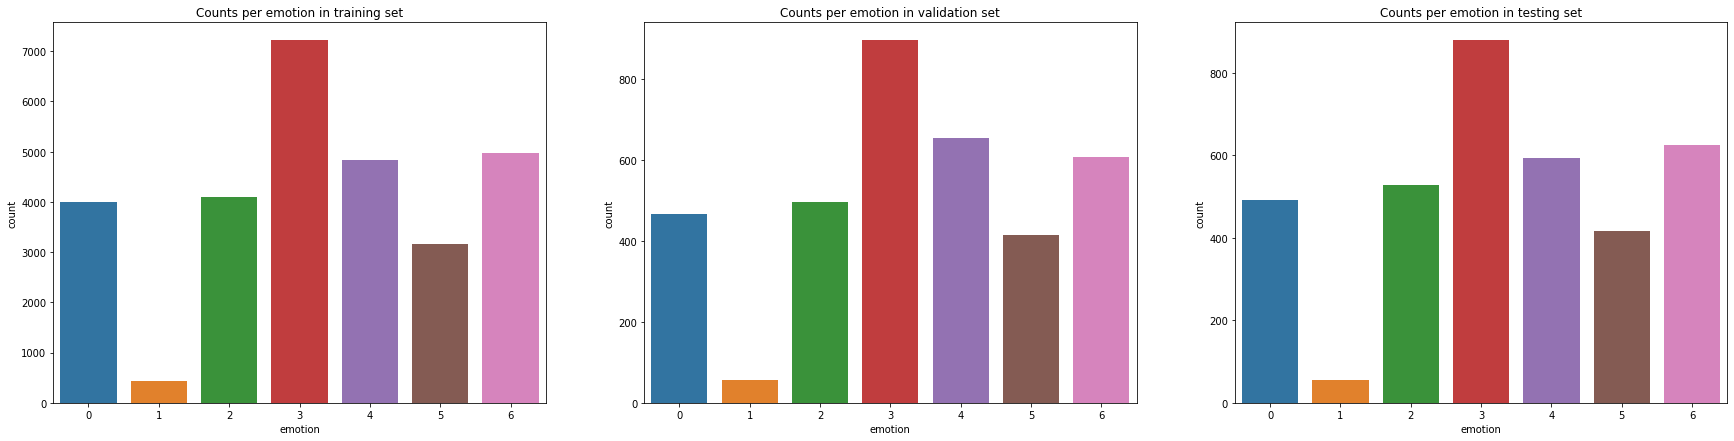

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = sns.countplot(y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set")

plt.subplot(1,3,2)
ax = sns.countplot(y_val)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in validation set")

plt.subplot(1,3,3)
ax = sns.countplot(y_test)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in testing set")

In [ ]:
y_train=train['emotion']
y_test=test['emotion']
y_val=val['emotion']

In [ ]:
sorted(y_train.unique())

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)

In [ ]:
y_train_cat.shape, y_test_cat.shape, y_val_cat.shape

((28709, 7), (3589, 7), (3589, 7))

In [ ]:
y_train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from tensorflow.keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

num_features = 64
num_labels = 6
width, height = 48, 48
optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

def initialize_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="Same", activation='relu', input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2,2), padding="Same", activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (2,2), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (2,2), padding="Same", activation='relu'))
    model.add(MaxPooling2D((2,2))) 
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (2,2), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (2,2), padding="Same", activation='relu'))
    model.add(MaxPooling2D((2,2))) 
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(7, activation='softmax'))


    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau  #Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.callbacks import EarlyStopping  #Stop training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    
    patience=6,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

batch_size = 32 

epochs = 100

model=initialize_model()

history = model.fit(X_train, y_train_cat,
          validation_data=[X_val, y_val_cat],
          epochs=50,  
          batch_size=64, 
          verbose=1,
          callbacks=callbacks)

Epoch 1/50
449/449 [==============================] - 263s 582ms/step - loss: 1.9442 - accuracy: 0.2726 - val_loss: 1.8163 - val_accuracy: 0.2145 - lr: 0.0010
Epoch 2/50
449/449 [==============================] - 259s 578ms/step - loss: 1.5915 - accuracy: 0.3720 - val_loss: 1.4737 - val_accuracy: 0.4397 - lr: 0.0010
Epoch 3/50
449/449 [==============================] - 261s 580ms/step - loss: 1.4830 - accuracy: 0.4279 - val_loss: 1.4216 - val_accuracy: 0.4489 - lr: 0.0010
Epoch 4/50
449/449 [==============================] - 261s 581ms/step - loss: 1.4255 - accuracy: 0.4519 - val_loss: 1.3818 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 5/50
449/449 [==============================] - 258s 574ms/step - loss: 1.3799 - accuracy: 0.4703 - val_loss: 1.3673 - val_accuracy: 0.4823 - lr: 0.0010
Epoch 6/50
449/449 [==============================] - 255s 567ms/step - loss: 1.3375 - accuracy: 0.4887 - val_loss: 1.2642 - val_accuracy: 0.5132 - lr: 0.0010
Epoch 7/50
449/449 [==========================

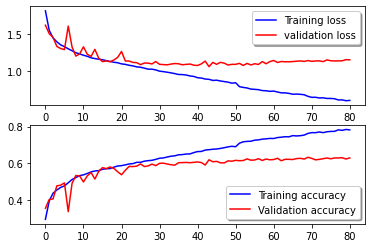

In [ ]:
 .loiop9fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Emotion_tool/models/model.h5')

In [ ]:
results= model.evaluate(X_test, y_test_cat, verbose=0)
results

[1.110321044921875, 0.6338813304901123]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
predictions=model.predict(X_test)
for i in predictions:
 
  pred_list.append(np.argmax(i))
for i in y_test_cat:
 
  actual_list.append(np.argmax(i))

cm=confusion_matrix(actual_list, pred_list)
cm

array([[256,   5,  36,  40,  75,   7,  72],
       [ 10,  31,   1,   2,   6,   3,   2],
       [ 54,   2, 212,  30,  99,  47,  84],
       [ 16,   1,  11, 764,  30,  14,  43],
       [ 59,   3,  42,  37, 294,   7, 152],
       [ 10,   0,  37,  38,  12, 299,  20],
       [ 40,   0,  24,  53,  85,   5, 419]])

Text(33.0, 0.5, 'pred_list')

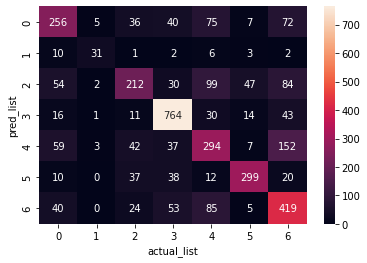

In [ ]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("actual_list")
plt.ylabel("pred_list")

In [ ]:
from keras.preprocessing import image
import cv2
 
img = cv2.imread('D:/image-1.png', cv2.IMREAD_GRAYSCALE)

def classify(image_path):
    
    #Reading the image and Converting Image into Grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #Resizing and Reshaping the image into the required format for the model 
    #create a batch of images (Convert single image to a batch: x= np.expand_dims(x, axis=0))
    x =cv2.resize(img, (48,48)).reshape((1,48,48,1))
    x = x/255
    #predict
    prediction = model.predict(x)
    predicted_class=np.argmax(prediction)
    predicted_emotion = emotions[predicted_class]
    return predicted_emotion

In [ ]:
result=classify("/content/gdrive/MyDrive/WIN_20220303_15_47_22_Pro.jpg")
result

'Sad'

In [ ]:
# Save your model here in .h5 format
model.save('model.h5')


In [ ]:
model.save_weights('weight.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/Emotion_tool/models/model.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(
        rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Emotion_tool/DATA/test_emotions_7cat',
        
        batch_size=64,
        target_size=(48,48),
        color_mode='grayscale',
        
    
        class_mode='categorical')

Found 47 images belonging to 7 classes.


In [ ]:
x_ev,y_ev = test_generator[0]
x_ev.shape

(47, 48, 48, 1)

In [ ]:
model.evaluate(x_ev,y_ev)

2/2 [==============================] - 9s 119ms/step - loss: 5.9028 - accuracy: 0.2553


[5.902813911437988, 0.25531914830207825]

In [ ]:
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

dct_2=emotions={0:'Angry',
          1:'Disgust',
          2:'Fear',
          3:'Happy',
          4:'Sad',
          5:'Surprise',
          6:'Neutral'}


for i,e in dct_2.items():
  acc = round(cm[i,i]/sum(cm[i])*100,1)
  print(f'{acc} % model correctly predict {e}')



52.1 % model correctly predict Angry
56.4 % model correctly predict Disgust
40.2 % model correctly predict Fear
86.9 % model correctly predict Happy
49.5 % model correctly predict Sad
71.9 % model correctly predict Surprise
66.9 % model correctly predict Neutral
